# Lab 5

In this lab we discuss scatterplots and how we can measure the linear correlation between two variables.

## Import necessary Python libraries

**scipy.stats:** https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import the data

In [2]:
# Read .csv data
auto = pd.read_csv("auto.csv")
# The data is a subset of the Auto dataset available at:
# https://archive.ics.uci.edu/ml/datasets/auto+mpg
# The head() function is used to get the first 5 rows.
auto.head()

,mpg,horsepower,weight,origin,name
0,18.0,130,3504,American,chevrolet chevelle malibu
1,15.0,165,3693,American,buick skylark 320
2,18.0,150,3436,American,plymouth satellite
3,16.0,150,3433,American,amc rebel sst
4,17.0,140,3449,American,ford torino


Variable description

mpg: miles per gallon <br>
horsepower:  Engine horsepower <br>
weight: Vehicle weight (lbs.)  <br>
origin: Origin of car (American, European, Japanese) <br>
name: Vehicle name


In [3]:
# The tail() function is used to get the last 5 rows.
auto.tail()

,mpg,horsepower,weight,origin,name
387,27.0,86,2790,American,ford mustang gl
388,44.0,52,2130,European,vw pickup
389,32.0,84,2295,American,dodge rampage
390,28.0,79,2625,American,ford ranger
391,31.0,82,2720,American,chevy s-10


In [4]:
# Finding the size of the dataset
# Our dataset has 392 rows and 5 columns.
auto.shape

(392, 5)

In [5]:
# Finding the type of each variable
auto.dtypes

mpg           float64
horsepower      int64
weight          int64
origin         object
name           object
dtype: object

In [6]:
# We should convert any obvious categorical variables to categories.
# "name" and "origin" are categorical variables in our dataset.
auto['name'] = auto['name'].astype('category')
auto['origin'] = auto['origin'].astype('category')
auto.dtypes

mpg            float64
horsepower       int64
weight           int64
origin        category
name          category
dtype: object

In [7]:
auto.describe() # calculating summary statistics for the quantitative variables

,mpg,horsepower,weight
count,392.000000,392.000000,392.000000
mean,23.445918,104.469388,2977.584184
std,7.805007,38.491160,849.402560
min,9.000000,46.000000,1613.000000
25%,17.000000,75.000000,2225.250000
50%,22.750000,93.500000,2803.500000
75%,29.000000,126.000000,3614.750000
max,46.600000,230.000000,5140.000000


## Scatterplots

**sns.scatterplot:** https://seaborn.pydata.org/generated/seaborn.scatterplot.html

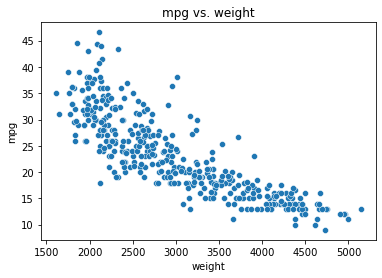

In [8]:
# Scatter plots are used to observe relationships between variables.
# In the scatterplot the x axis is generally the name of a predictor/independent variable.
# In the scatterplot the y axis is generally the name of a response/dependent variable.
# It can be seen that there is a negative relationship between "mpg" (miles per gallon) and "weight".
# The heavier the car fewer miles per gallon it will make. 
sns.scatterplot(x = "weight", y = "mpg", data = auto)
plt.title("mpg vs. weight")
plt.show()

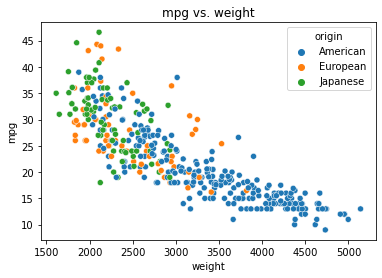

In [9]:
# coloring the points according to the origin of the car
sns.scatterplot(x = "weight", y = "mpg", hue = 'origin', data = auto)
plt.title("mpg vs. weight")
plt.show()

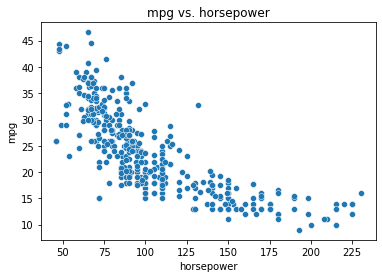

In [10]:
sns.scatterplot(x = "horsepower", y = "mpg", data = auto)
plt.title("mpg vs. horsepower")
plt.show()

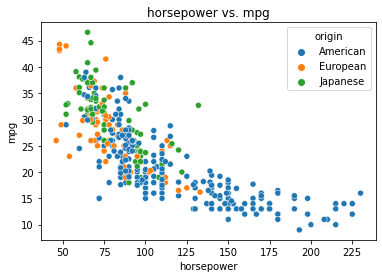

In [11]:
sns.scatterplot(x = "horsepower", y = "mpg", hue = "origin", data = auto)
plt.title("horsepower vs. mpg")
plt.show()

**sns.pairplot:** https://seaborn.pydata.org/generated/seaborn.pairplot.html

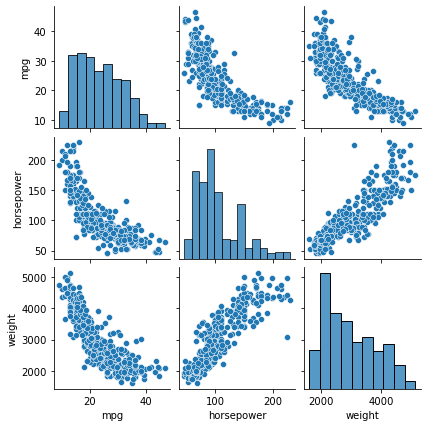

In [12]:
# The pairplot shows the scatterplots between all pairs of quantitative variables in a dataset.
# It also shows the histogram of each individual variable. 
sns.pairplot(auto, height = 2, kind = 'scatter')
plt.show()

## Correlation coefficient *r*

**stats.pearsonr:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [13]:
# The Pearson correlation coefficient is a single number that describes the extent 
# of the linear relationship between two variables.
# The coefficient varies between -1 and +1 with 0 implying no correlation.
# Correlations of -1 or +1 imply an exact linear relationship.
# Positive correlations imply that as x increases, so does y.
# Negative correlations imply that as x increases, y decreases.
# It seems there is a strong negative correlation between "weight" and "mpg".
r = stats.pearsonr(auto['mpg'], auto['weight'])[0]
r

-0.8322442148315755

**DataFrame.corr:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [14]:
# A correlation matrix can be used to show the correlation coefficient between 
# all pairs of quantitative variables in a dataset.
# Every correlation matrix is symmetrical.
# The correlation between each variable and itself is 1, hence the diagonal.
corr_matrix = auto.corr(method = 'pearson')
round(corr_matrix, 2)

,mpg,horsepower,weight
mpg,1.00,-0.78,-0.83
horsepower,-0.78,1.00,0.86
weight,-0.83,0.86,1.00


**sns.heatmap:** https://seaborn.pydata.org/generated/seaborn.heatmap.html

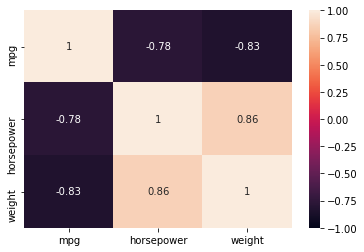

In [15]:
# Heatmaps replace numbers with colors of varying shades, as indicated by the scale on the right.
# This type of visualization can make it easier to spot linear relationships between variables than a table of numbers.
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True)
plt.show()

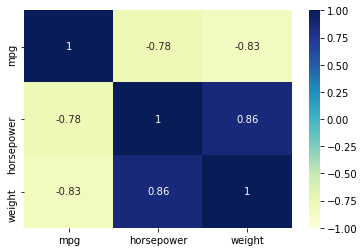

In [16]:
# heatmap with a different color scheme
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True,cmap="YlGnBu")
plt.show()